<a href="https://colab.research.google.com/github/leandrorodor/PGR-IESB-P9045-CDNA-20203/blob/main/analise_sentimento_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise de sentimento

Aula baseada nas lições do professor Walmes M. Zeviani, da UFPR

Base de dados do site http://www.carrosnaweb.com.br/.

## Utilizando R nativo no Google Colab

[Clique aqui!](https://colab.research.google.com/notebook#create=true&language=r)

## Verificando versão do R

In [3]:
version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          0.4                         
year           2021                        
month          02                          
day            15                          
svn rev        80002                       
language       R                           
version.string R version 4.0.4 (2021-02-15)
nickname       Lost Library Book           

## Definir área de trabalho

In [2]:
setwd("/content/sample_data/analise_sentimento")

## Instalar packages do projeto

In [3]:
install.packages("jsonlite")
install.packages("tm")
install.packages("tidytext")
install.packages("tidyverse")
install.packages("DT")
install.packages("wordcloud")
install.packages("lexiconPT")
install.packages("leaflet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘NLP’, ‘slam’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SnowballC’, ‘hunspell’, ‘tokenizers’, ‘janeaustenr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gridExtra’, ‘png’, ‘raster’, ‘sp’, ‘viridis’, ‘leaflet.providers’




## Carregar bibliotecas necessárias para scraping

In [5]:
library(jsonlite)
library(tm)
library(tidytext)
library(tidyverse)
library(DT)
library(wordcloud)
library("leaflet")

# Carrega os dicionários léxicos em português
library(lexiconPT)
ls("package:lexiconPT")

[1] "get_word_sentiment" "oplexicon_v2.1"     "oplexicon_v3.0"    
[4] "sentiLex_lem_PT02"

## Carregar JSON com opiniões sobre veículos

In [12]:
url <- paste0("https://github.com/leg-ufpr/hackathon/blob/master", "/opinioes.json?raw=true")

txt <- fromJSON(url)
str(txt)

 chr [1:5329, 1:10] "e2b9dc08" "3b9dcf63" "9f62a709" "0e6c8d29" "3c958631" ...


## Transfomar opiniões em tabela para análise

In [7]:
colnames(txt) <- c("id", "title", "model", "owner", "condition", "good",
                   "bad", "defect", "general", "ts")
tt <- as_tibble(txt)
glimpse(tt)

tt$product <- tt$model %>%
  str_extract("^([[:alpha:]]+ +[[:alpha:]]+)") %>%
  str_to_upper()


tt$product %>% 
  unique() %>%
  dput()

tt %>%
  count(product, sort = TRUE)

Rows: 5,329
Columns: 10
$ id        <chr> "e2b9dc08", "3b9dcf63", "9f62a709", "0e6c8d29", "3c958631", …
$ title     <chr> "\"MELHOR POPULAR DO MERCADO ATÉ 2012\"", "\"Ótimo carro a u…
$ model     <chr> "Chevrolet Celta LT 1.0 2011/2012", "Chevrolet Celta LT 1.0 …
$ owner     <chr> "João - Brasília DF", "Hugo - São Pedro SP", "Ivan - Salvado…
$ condition <chr> "Dono há 6 anos - 35.200 kmCarro anterior: Fiat Uno", "Dono …
$ good      <chr> "Prós:ECONOMIA DE COMBUSTÍVEL, PEÇAS BARATAS, RESISTENTE, PR…
$ bad       <chr> "Contras:UM POUCO BAIXO.. AS VEZES QUANDO ESTÁ CARREGADO PEG…
$ defect    <chr> "Defeitos apresentados:NENHUM", "Defeitos apresentados:Nenhu…
$ general   <chr> "Opinião Geral:O CARRO É 10 ESTOU COM ELE A 7 ANOS E RODEI 3…
$ ts        <chr> "09/03/2018 17:40:00", "02/03/2018 21:27:00", "27/02/2018 23…
c("CHEVROLET CELTA", "CHEVROLET ONIX", "FIAT PALIO", "FIAT UNO", 
"HYUNDAI HB", "RENAULT SANDERO", "VOLKSWAGEN FOX", "VOLKSWAGEN GOL"
)


product,n
<chr>,<int>
VOLKSWAGEN GOL,1486
FIAT PALIO,758
RENAULT SANDERO,712
VOLKSWAGEN FOX,613
FIAT UNO,591
CHEVROLET CELTA,496
HYUNDAI HB,452
CHEVROLET ONIX,221


## Aplicar filtro para reter apenas um modelo de carro

In [13]:
mod <- c("CHEVROLET CELTA",
         "CHEVROLET ONIX",
         "FIAT PALIO",
         "FIAT UNO",
         "HYUNDAI HB",
         "RENAULT SANDERO",
         "VOLKSWAGEN FOX",
         "VOLKSWAGEN GOL")[8]

texto <- tt %>%
  filter(str_detect(product, mod)) %>%
  select(id, general)

texto

id,general
<chr>,<chr>
8aae5855,Opinião Geral:Carro.bom porem tem que ter atenção com o carburador dele ! Chato porem fazendo as limpezas de 5 em 5 mese ou melhor de 3 em 3 meses ele não vai deixar na mão! Atenção também com o túnel vejam si tem trincas si tiver não comprem! Eu gosto muito do meu já achei palio vectra no rolo mas não quis !
d2b207e9,"Opinião Geral:No geral é uma ótima condução, barato, econômico, confiável e onde você vai todo mundo gosta do carro, sabendo cuidar você irá longe com seu Golzinho."
02ca3587,"Opinião Geral:Estou muito satisfeito com o carro, só estou me desfazendo dele porque estou negociando um carro mais novo. se eu tivesse condições de manter os 2 com certeza continuaria com ele. Muito bom. quem não gosta, realmente não gosta Mas quem gosta, Ama."
02cf3205,"Opinião Geral:é um carro que não te deixa na mão se você cuida bem, não te da surpresas e aguenta toda e qualquer situação."
b293d2b9,"Opinião Geral:É o xodó da família, não é o mais potente e nem de longe o mais luxuoso, mas o mais divertido e mais pratico, geralmente sendo usado apenas nos fins de semana pra passear."
f3c26bed,Opinião Geral:e um bom carro todo mecanico sabe mexe se cuidar bem nao da muito gasto nao tem muito conforto e basico mas tbem tem menos coisa pra dar defeito e um carro sem frescura recomendo pra quem quer um veiculo que gaste pouco em manutençao e combustivel
1996d7bb,"Opinião Geral:Comprei meu Gol de um casal de idosos que cuidou muito do veículo. Em suma, ele já estava ótimo, apenas troquei as peças de desgaste natural e agora ele está ótimo. Recomendo a compra desde que não use para o trabalho durante o dia falei sobre ar condicionado e que você tenha disponibilidade em analisar o caro e trocar as peças desgastadas pelo tempo. Ótimo carro e que dá vontade de limpar todos os cantos e de ligar só para ouvir o motor! Recomendo."
efb9da50,"Opinião Geral:Em geral não tenho que reclamar me leva pra qualquer lugar ,não paga IPVA que é um absurdo em sao paulo é um carro otimo pra quem gosta de tunar carro aplicar turbo.eu recomendo pra quem gosta da era dos golzin quadrado"
5700b7ba,"Opinião Geral:Carro muito valente, da pau em muito carro novo, não troco por nem um 1.0 de hoje em dia, pelo preço que se compra e pela mecânica que tem é uma ótima pedida."


## Preprocessamento do texto para análise de sentimentos.

## Realizar preprocessamento padrão do texto

In [14]:
texto$general <- texto$general %>%
  str_replace("Opinião Geral:", "") %>%   # Remove começo.
  str_to_lower() %>%                      # Caixa baixa.
  str_replace_all(" *-+ *", "") %>%       # Remove hífen.
  str_replace_all("[[:punct:]]", " ") %>% # Pontuação por espaço.
  removeNumbers() %>%                     # Remove números.
  trimws()                                # Sem espaços nas bordas.

In [15]:
# Stop words padrão do idioma português.
stopwords(kind = "pt")

[1] "de"           "a"            "o"            "que"          "e"           
  [6] "do"           "da"           "em"           "um"           "para"        
 [11] "com"          "não"          "uma"          "os"           "no"          
 [16] "se"           "na"           "por"          "mais"         "as"          
 [21] "dos"          "como"         "mas"          "ao"           "ele"         
 [26] "das"          "à"            "seu"          "sua"          "ou"          
 [31] "quando"       "muito"        "nos"          "já"           "eu"          
 [36] "também"       "só"           "pelo"         "pela"         "até"         
 [41] "isso"         "ela"          "entre"        "depois"       "sem"         
 [46] "mesmo"        "aos"          "seus"         "quem"         "nas"         
 [51] "me"           "esse"         "eles"         "você"         "essa"        
 [56] "num"          "nem"          "suas"         "meu"          "às"          
 [61] "minha"        "numa"         "pelos"        "elas"         "qual"        
 [66] "nós"          "lhe"          "deles"        "essas"        "esses"       
 [71] "pelas"        "este"         "dele"         "tu"           "te"          
 [76] "vocês"        "vos"          "lhes"         "meus"         "minhas"      
 [81] "teu"          "tua"          "teus"         "tuas"         "nosso"       
 [86] "nossa"        "nossos"       "nossas"       "dela"         "delas"       
 [91] "esta"         "estes"        "estas"        "aquele"       "aquela"      
 [96] "aqueles"      "aquelas"      "isto"         "aquilo"       "estou"       
[101] "está"         "estamos"      "estão"        "estive"       "esteve"      
[106] "estivemos"    "estiveram"    "estava"       "estávamos"    "estavam"     
[111] "estivera"     "estivéramos"  "esteja"       "estejamos"    "estejam"     
[116] "estivesse"    "estivéssemos" "estivessem"   "estiver"      "estivermos"  
[121] "estiverem"    "hei"          "há"           "havemos"      "hão"         
[126] "houve"        "houvemos"     "houveram"     "houvera"      "houvéramos"  
[131] "haja"         "hajamos"      "hajam"        "houvesse"     "houvéssemos" 
[136] "houvessem"    "houver"       "houvermos"    "houverem"     "houverei"    
[141] "houverá"      "houveremos"   "houverão"     "houveria"     "houveríamos" 
[146] "houveriam"    "sou"          "somos"        "são"          "era"         
[151] "éramos"       "eram"         "fui"          "foi"          "fomos"       
[156] "foram"        "fora"         "fôramos"      "seja"         "sejamos"     
[161] "sejam"        "fosse"        "fôssemos"     "fossem"       "for"         
[166] "formos"       "forem"        "serei"        "será"         "seremos"     
[171] "serão"        "seria"        "seríamos"     "seriam"       "tenho"       
[176] "tem"          "temos"        "tém"          "tinha"        "tínhamos"    
[181] "tinham"       "tive"         "teve"         "tivemos"      "tiveram"     
[186] "tivera"       "tivéramos"    "tenha"        "tenhamos"     "tenham"      
[191] "tivesse"      "tivéssemos"   "tivessem"     "tiver"        "tivermos"    
[196] "tiverem"      "terei"        "terá"         "teremos"      "terão"       
[201] "teria"        "teríamos"     "teriam"

In [17]:
# Efeito de remover as stop words.
head(texto$general, n = 1) %>%
  str_wrap(72) %>%
  cat("\n")

head(texto$general, n = 1) %>%
  removeWords(words = stopwords(kind = "pt")) %>%
  str_wrap(72) %>%
  cat("\n")

carro bom porem tem que ter atenção com o carburador dele chato porem
fazendo as limpezas de em mese ou melhor de em meses ele não vai deixar
na mão atenção também com o túnel vejam si tem trincas si tiver não
comprem eu gosto muito do meu já achei palio vectra no rolo mas não quis 
carro bom porem ter atenção carburador chato porem fazendo limpezas mese
melhor meses vai deixar mão atenção túnel vejam si trincas si comprem
gosto achei palio vectra rolo quis 


In [18]:
# Remoção das stop words.
texto$general <- texto$general %>%
  removeWords(words = c("bom", "muito", "pouco",
                        stopwords(kind = "pt")))

In [19]:
# Faz tokenização nas palavras individuais e empilha as palavras.
texto_un <- texto %>%
  unnest_tokens(output = "words", input = general)
texto_un

id,words
<chr>,<chr>
8aae5855,carro
8aae5855,porem
8aae5855,ter
8aae5855,atenção
8aae5855,carburador
8aae5855,chato
8aae5855,porem
8aae5855,fazendo
8aae5855,limpezas


## Operações para determinar a polaridade.

In [20]:
# Uma amostra do dicionário de termos rotulados.
sample_n(oplexicon_v3.0, size = 20) %>%
  arrange(polarity)

term,type,polarity,polarity_revision
<chr>,<chr>,<int>,<chr>
bizarro,adj,-1,M
antipatica,adj,-1,M
pando,adj,-1,A
obscurecidos,adj,-1,A
gerais,adj,0,M
sozinhas,adj,0,M
trabucar,vb,0,A
intrepidas e serenas,adj,0,A
acaroar,vb,0,A


In [21]:
# Contagem por polaridade.
oplexicon_v3.0 %>%
  count(polarity, sort = TRUE)

polarity,n
<int>,<int>
-1,14569
0,9002
1,8620


In [22]:
# Contagem por classe gramatical.
oplexicon_v3.0 %>%
  count(type, sort = TRUE)

type,n
<chr>,<int>
adj,24475
vb,6889
htag,471
vb det n prp,103
vb n prp,91
vb adj,74
emot,66
vb adv,22


In [23]:
# Faz o a junção por interseção.
tb_sen <- inner_join(texto_un,
                     oplexicon_v3.0[, c("term", "polarity")],
                     by = c("words" = "term"))

In [24]:
# Agora o termos tem sua polaridade presente na tabela.
sample_n(tb_sen, size = 20)

id,words,polarity
<chr>,<chr>,<int>
b1589c9e,ter,0
63da6144,total,0
bae96a16,silencioso,0
5e23deba,acabamento,1
a3ffc4c9,gastar,0
2cd60ef3,pagar,-1
e4974af9,trocar,0
6f877932,completo,0
253f4b9a,pagar,-1


In [25]:
# Faz a agregação da polaridade por documento.
tb <- tb_sen %>%
  group_by(id) %>%
  summarise(soma = sum(polarity),
            n = n(),
            sentiment = soma/n)
tb

,id,soma,n,sentiment
,<chr>,<int>,<int>,<dbl>
1,00022137,5,8,0.6250000
2,000a582d,0,1,0.0000000
3,001e058b,3,3,1.0000000
4,0090acd0,-1,1,-1.0000000
5,009d1244,-1,5,-0.2000000
6,00d71069,1,3,0.3333333
7,0113e625,2,4,0.5000000
8,011a1b47,1,2,0.5000000
9,0191d739,2,3,0.6666667


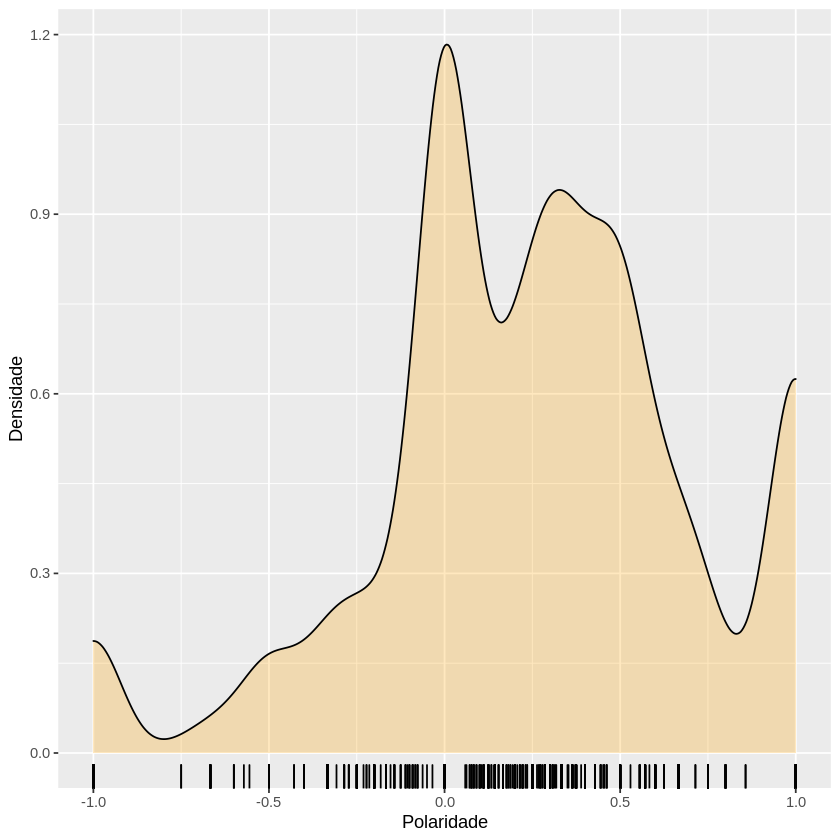

In [26]:
# Desidade expírica kernel do escore de sentimento.
ggplot(tb, aes(x = sentiment)) +
  geom_density(fill = "orange", alpha = 0.25) +
  geom_rug() +
  labs(x = "Polaridade", y = "Densidade")

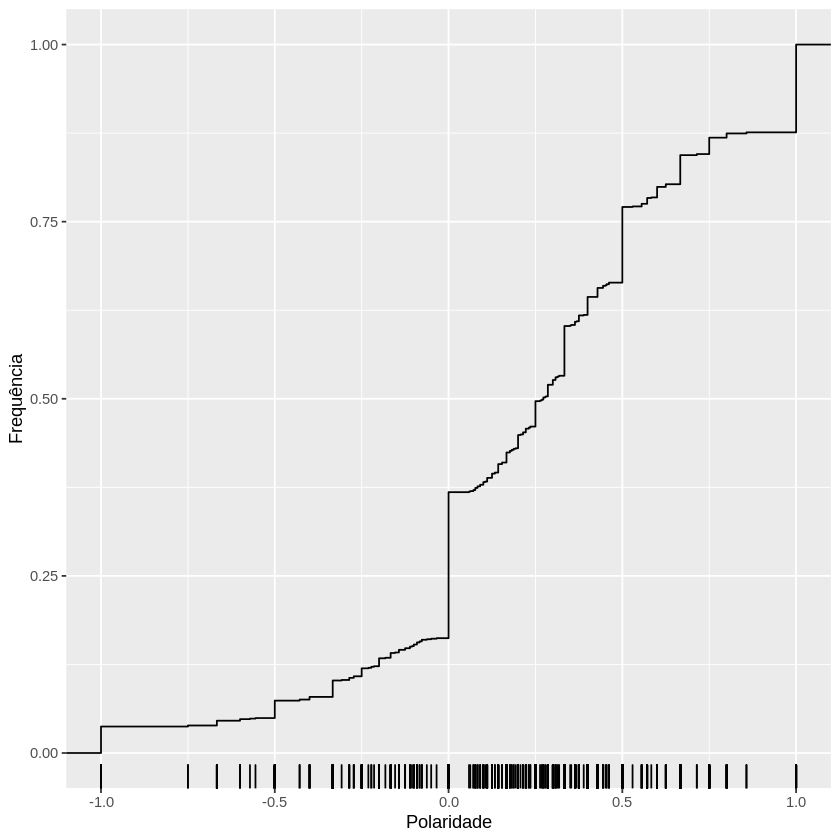

In [27]:
# Frequência relativa acumulada.
ggplot(tb, aes(x = sentiment)) +
  stat_ecdf() +
  geom_rug() +
  labs(x = "Polaridade", y = "Frequência")

In [28]:
# As avaliações mais positivas.
tb %>%
  top_n(sentiment, n = 10) %>%
  inner_join(tt[, c("id", "general")]) %>%
  select(sentiment, general)

Joining, by = "id"



sentiment,general
<dbl>,<chr>
1,"Opinião Geral:Estou feliz com meu carrinho, só me deu alegria. Só não gosto do conforto que deixa a desejar. Antes eu tive um Corcel II e um Escort que davam banho de conforto e acabamento no Gol, más a suspensão dos dois era muito frágil."
1,"Opinião Geral:recomendo carro bom mas tem que cuidar, fica esperto se tiver baixando agua."
1,Opinião Geral:Carro muito bom confiável já fiz três viagens consumo de 11km/l no álcool na estrada e 8 na cidade e nenhum defeito. Muito satisfeito!
1,Opinião Geral:Bom carro. Não tenho o que reclamar.
1,"Opinião Geral:Ele é bem melhor que palio,é muito valente,só é um pouco beberrão para 1.0 a gasolina,só faz 11km/l,tirando isso é perfeito!"
1,Opinião Geral:Carro excelente eu recomendo muito bom.
1,"Opinião Geral:Baita Carro, como sempre foi o Gol."
1,"Opinião Geral:É um carro que vale a pena pelo seu excelente custo-benefício.,e dá para mantê-lo gastando-se pouco com ele.Eu recomendo!"
1,"Opinião Geral:Infelizmente, me arrependi bastante de trocado meu Corsa por esse carro. Passei um ano com ele, cerca de 13.000km e hoje finalmente resolvi deixá-lo na concessionária para venda."


In [29]:
# As avaliações mais negativas.
tb %>%
  top_n(sentiment, n = -10) %>%
  inner_join(tt[, c("id", "general")]) %>%
  select(sentiment, general)

Joining, by = "id"



sentiment,general
<dbl>,<chr>
-1,Opinião Geral:Pessimo carro. Ainda irei adesivar no vidro traseiro NAO COMETA MESMO ERRO QUE COMETI . NÃO COMPRE UM GOL
-1,"Opinião Geral:é um carro que não te deixa na mão se você cuida bem, não te da surpresas e aguenta toda e qualquer situação."
-1,Opinião Geral:Pior compra que já fiz.
-1,Opinião Geral:COMPREI E ME ARREPENDI EU JA ANDEI 8000 KM SO
-1,Opinião Geral:Tentei explicar o problema na loja e eles disseram que o carro é assim mesmo.
-1,Opinião Geral:Comprei um carro zero que esta dando mais defeito do o carro usado que tinha antes.
-1,"Opinião Geral:Levei o carro a concessionária uma vez, disseram que os cilindros tinham carbonizado, por isso do barulho, tirei o carro da oficina e no outro dia o barulho era o mesmo. Despois de discutir com eles por telefone estarei levando o carro novamente a loja dia 10/06/2013."
-1,"Opinião Geral:o carro é fraco, não compro mais."
-1,Opinião Geral:pessimo carro


## Exibição dos resultados

In [30]:
# Tabela com as avaliações originais sem o preprocessamento.
tb_u <- tb %>%
  inner_join(tt[, c("id", "general")]) %>%
  select(id, sentiment, general) %>%
  mutate(general = str_replace(general, "Opinião Geral:", ""))

Joining, by = "id"



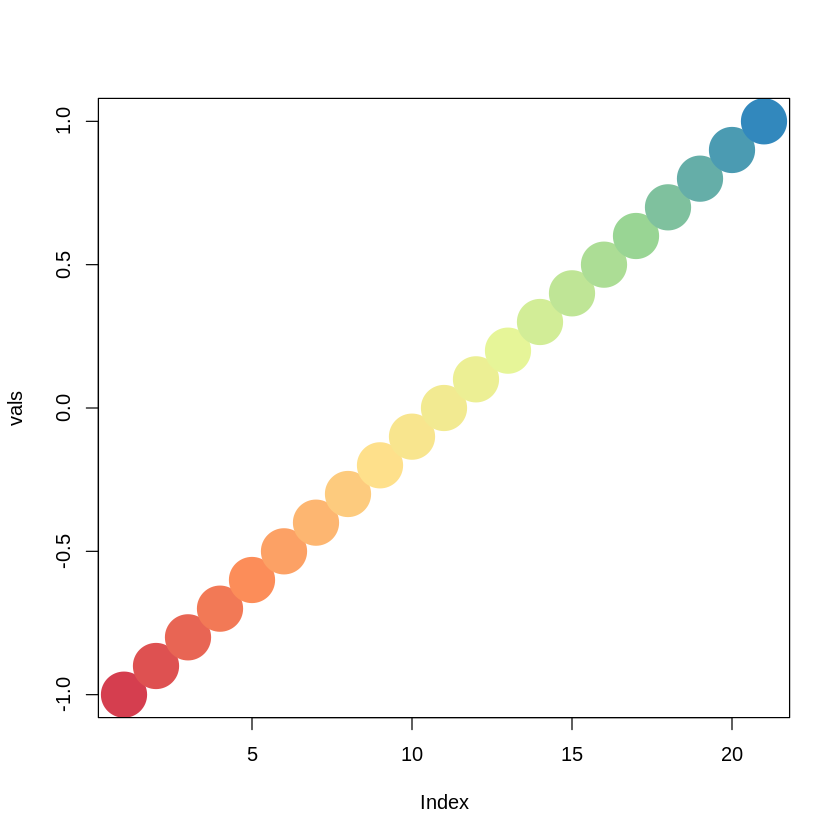

In [32]:
# Valores e cores para formatação condicional das cédulas da tabela.
vals <- seq(-1, 1, by = 0.1)
cols <- colorRampPalette(
  RColorBrewer::brewer.pal(n = 6, name = "Spectral"))(length(vals))
  plot(vals, col = cols, pch = 19, cex = 5)

In [33]:
# Define o estilo de formatação condicional.
style <- styleInterval(cuts = head(vals[-1], n = -1),
                       values = cols[-1])

In [34]:
html_table <-
  datatable(tb_u,
            colnames = c("Avaliação",
                         "Sentimento",
                         "Opinião Geral")) %>%
  formatRound(columns = "sentiment", digits = 2) %>%
  formatStyle(columns = names(tb_u),
              valueColumns = "sentiment",
              target = "cell",
              backgroundColor = style)
html_table

HTML widgets cannot be represented in plain text (need html)